In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import expm_multiply
from PIL import Image
import colorsys
import cv2

In [63]:
image = Image.open('schrodinger2.jpg').convert('L')
psi0_image = np.array(image, dtype=np.float64) / 255.0 
ny, nx = psi0_image.shape
print(f"Grid size: {nx} x {ny}")

Grid size: 608 x 1080


In [64]:
psi0 = np.sqrt(psi0_image.ravel())
psi0 = psi0 / np.linalg.norm(psi0)

In [ ]:
#psi0 = np.ones(nx*ny) / (nx*ny)
#V = psi0_image.ravel()  # Use the image intensity as the potential
#V = V / np.max(V)

In [65]:
# Build Hamiltonian
diag_x = np.ones([nx])
diags_x = np.array([diag_x, -2*diag_x, diag_x])
D_x = sparse.spdiags(diags_x, [-1, 0, 1], nx, nx)

diag_y = np.ones([ny])
diags_y = np.array([diag_y, -2*diag_y, diag_y])
D_y = sparse.spdiags(diags_y, [-1, 0, 1], ny, ny)

T = -1/2 * sparse.kronsum(D_x, D_y)
V = np.zeros(nx * ny)
U = sparse.diags(V, 0)
H = T + U

In [66]:
frames = 1800
dt = 0.3
dpi = 72

In [67]:
psi = psi0
for i in range(frames):
    psi = psi / np.linalg.norm(psi)
    psi = expm_multiply(-1j * H * dt, psi)
    u = np.absolute(psi.reshape(ny, nx))**2 * 255
    fig = plt.figure(figsize=(nx / dpi, ny / dpi), dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(u, aspect='auto', cmap='gray')
    ax.axis("off") 
    plt.savefig(f"images/frame-{int(i):04d}.png", dpi=dpi, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.close(fig)

KeyboardInterrupt: 

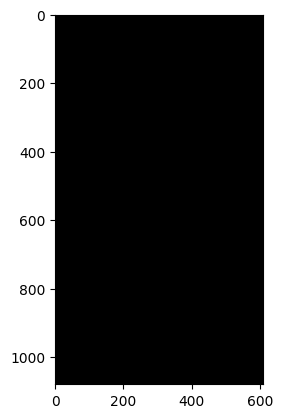

In [53]:

psi = expm_multiply(-1j * H * 0, psi0)
u = np.absolute(psi.reshape(ny, nx))**2
plt.imshow(u, cmap='gray')

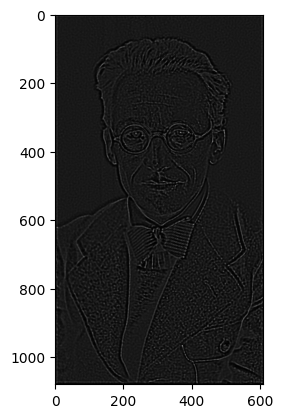

In [54]:
# test
psi = expm_multiply(-1j * H * 10, psi0)
u = np.absolute(psi.reshape(ny, nx))**2
plt.imshow(u, cmap='gray')

In [45]:
psi

array([-5.25894248e-06-3.85000867e-05j, -4.64844720e-05-3.91297067e-05j,
       -1.00684190e-05+5.77409002e-06j, ...,
        1.12064522e-04-1.02131790e-05j,  9.64050464e-05-1.33805795e-05j,
        7.56178682e-05-8.04486763e-05j])

# color

In [150]:
def psi_to_rgb(psi):
    intensity = np.abs(psi)**2  # |psi(t)|^2
    phase = np.angle(psi)  # Phase in [-π, π]
    
    # HSL components
    hue = (phase + np.pi) / (2 * np.pi)  # Map phase to [0, 1]
    saturation = np.ones_like(hue)  # Full saturation by default
    saturation[np.abs(phase) < 1e-6] = 0  # Set saturation to 0 for phase = 0 (grayscale)
    
    # Lightness mapped by intensity
    max_intensity = np.max(intensity)
    lightness = np.clip(intensity / max_intensity, 0, 1) if max_intensity > 0 else intensity
    
    # Use vectorized operations for HSL to RGB conversion
    rgb = np.zeros(hue.shape + (3,))  # Initialize RGB array
    
    # Apply HLS to RGB conversion for the entire array
    for i in range(3):  # Apply conversion to R, G, B channels separately
        rgb[..., i] = np.vectorize(lambda h, l, s: colorsys.hls_to_rgb(h, l, s)[i])(hue, lightness, saturation)
    
    return rgb

In [185]:
def rgb_to_hsl_vectorized(rgb):
    # Reshape to (N, 3) and convert each pixel
    shape = rgb.shape
    rgb_flat = rgb.reshape(-1, 3)
    hsl_flat = np.array([colorsys.rgb_to_hls(*pixel) for pixel in rgb_flat])
    return hsl_flat.reshape(shape)  # Reshape back to original

In [186]:
image = Image.open('einstein.jpeg').convert('RGB')
rgb_array = np.array(image, dtype=np.float64) / 255.0  # Normalize to [0,1]

hsl_image = rgb_to_hsl_vectorized(rgb_array)

# Extract hue (for phase) and lightness (for intensity)
hue = hsl_image[..., 0] * (2 * np.pi)  # Scale hue [0,1] to [0,2π]
intensity = hsl_image[..., 1]  # Use lightness as intensity

# Construct psi0_image using Euler's formula
psi0_image = intensity * np.exp(1j * hue)

# Get grid size
ny, nx = psi0_image.shape[:2]
print(f"Grid size: {nx} x {ny}")

Grid size: 756 x 1080


In [192]:
psi0 = psi0_image.ravel()
psi0 = psi0 / np.linalg.norm(psi0)

In [190]:
# Build Hamiltonian
diag_x = np.ones([nx])
diags_x = np.array([diag_x, -2*diag_x, diag_x])
D_x = sparse.spdiags(diags_x, [-1, 0, 1], nx, nx)

diag_y = np.ones([ny])
diags_y = np.array([diag_y, -2*diag_y, diag_y])
D_y = sparse.spdiags(diags_y, [-1, 0, 1], ny, ny)

T = -1/2 * sparse.kronsum(D_x, D_y)
V = np.zeros(nx * ny)
U = sparse.diags(V, 0)
H = T + U

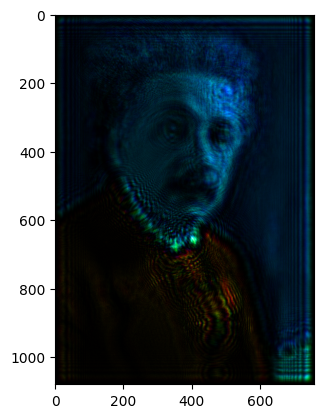

In [196]:
psi = expm_multiply(-1j * H * 100, psi0)
plt.imshow(psi_to_rgb(psi.reshape(ny, nx)))

In [ ]:

# Prepare animation data
psi_t_rgb_list = []
for i, psi_t_flat in enumerate(psi_t_flat_all):
    psi_t = psi_t_flat.reshape(nx, ny)
    rgb_frame = psi_to_rgb(psi_t)
    psi_t_rgb_list.append(rgb_frame) 